In [10]:
import pandas as pd
import numpy as np

trainData = pd.read_parquet('/content/gdrive/My Drive/DataScience/Class1.parquet', engine='pyarrow')
testData = pd.read_parquet('/content/gdrive/My Drive/DataScience/validation.parquet', engine='pyarrow')
trainData = trainData.T 
testData = testData.T 

dataset = trainData.append(testData)

In [3]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61400,61401,61402,61403,61404,61405,61406,61407,61408,61409,61410,61411,61412,61413,61414,61415,61416,61417,61418,61419,61420,61421,61422,61423,61424,61425,61426,61427,61428,61429,61430,61431,61432,61433,61434,61435,61436,61437,61438,61439
instance_0,0.041259,0.041259,0.032573,0.023887,0.029315,0.041259,0.045602,0.038001,0.030401,0.032573,0.041259,0.046687,0.045602,0.040173,0.034744,0.034744,0.040173,0.042344,0.038001,0.030401,0.027144,0.027144,0.030401,0.030401,0.026058,0.029315,0.044516,0.049945,0.041259,0.034744,0.040173,0.045602,0.040173,0.032573,0.032573,0.036916,0.043430,0.048859,0.047773,0.033658,...,0.041259,0.116176,0.051030,-0.022801,0.056459,0.115090,0.016286,-0.056459,0.015201,0.062974,-0.002172,-0.016286,0.043430,0.018458,-0.026058,0.034744,0.084689,0.039087,0.000000,-0.010858,-0.038001,-0.018458,0.047773,0.047773,-0.024972,-0.020629,0.078174,0.093375,0.018458,0.013029,0.034744,-0.007600,-0.003257,0.065145,0.047773,-0.009772,0.031487,0.096632,0.077089,0.040173
instance_1,-0.211722,-0.264924,-0.274696,-0.236694,-0.156349,-0.059716,0.005429,0.046687,0.153091,0.281210,0.317040,0.318126,0.356127,0.390871,0.386528,0.292068,0.130290,0.040173,0.024972,-0.052116,-0.169378,-0.219322,-0.219322,-0.230180,-0.267095,-0.312697,-0.310526,-0.266010,-0.235609,-0.172635,-0.038001,0.042344,0.066231,0.178064,0.317040,0.410415,0.461445,0.429959,0.353956,0.294239,...,-0.321383,0.141148,0.513562,0.640595,0.787171,1.016265,1.059696,0.850145,0.771971,0.750256,0.387614,-0.090118,-0.414758,-0.638423,-0.781743,-0.842545,-0.892490,-0.998893,-0.918548,-0.572192,-0.279039,-0.033658,0.205207,0.465788,0.847974,1.145470,1.130270,0.875117,0.701397,0.568935,0.260581,-0.004343,-0.241037,-0.636252,-0.953292,-0.980436,-0.846888,-0.838202,-0.880546,-0.739398
instance_2,0.214105,0.154930,0.136640,0.013987,-0.038733,-0.015063,-0.111894,-0.104363,0.047340,-0.054871,-0.235623,-0.174296,-0.189359,-0.302329,-0.238851,-0.128033,-0.058099,0.034429,-0.005380,-0.078541,0.060251,0.117273,0.025822,0.078541,0.163537,0.146323,0.116198,0.051643,-0.013987,0.020442,0.011835,-0.089300,-0.043036,-0.046264,-0.242078,-0.247458,-0.215181,-0.375490,-0.345365,-0.153854,...,-0.080693,-0.515358,-0.682123,-0.940340,-1.264186,-1.320134,-1.127547,-1.005970,-0.762816,-0.193663,0.278659,0.539028,0.754208,1.037171,1.178114,1.178114,1.252352,1.164128,0.753132,0.313088,-0.094679,-0.383022,-0.710096,-1.136154,-1.333044,-1.244820,-1.058689,-0.930656,-0.731614,-0.318467,0.040884,0.375490,0.699337,0.965085,1.086662,1.132926,1.279249,1.296464,0.937112,0.451879
instance_3,-0.154837,-0.127768,-0.217638,-0.284770,-0.299929,-0.270694,-0.077960,0.092036,0.076877,0.154837,0.296681,0.228466,0.165665,0.272859,0.316170,0.288018,0.258783,0.125602,0.011911,0.011911,-0.075794,-0.129933,-0.048725,-0.028152,-0.120188,-0.204645,-0.238211,-0.253370,-0.258783,-0.275025,-0.180824,0.051973,0.081208,0.018407,0.188403,0.294515,0.245790,0.342157,0.409289,0.292349,...,0.217638,0.123436,-0.122354,-0.264197,-0.110443,0.080125,0.036814,0.032483,-0.006497,-0.187320,-0.144009,0.120188,0.272859,0.140761,0.027069,-0.018407,-0.152671,-0.089870,0.098533,0.084457,-0.018407,-0.149423,-0.144009,-0.090953,-0.132099,-0.113691,0.001083,0.153754,0.085539,-0.205727,-0.286936,-0.171079,-0.036814,-0.024904,0.031400,0.140761,-0.011911,-0.173244,-0.063884,0.081208
instance_4,-1.022780,-0.916376,-0.676425,-0.461445,-0.330069,-0.122690,0.178064,0.489675,0.799115,0.931577,0.938091,0.997808,0.948949,0.618880,0.212808,-0.015201,-0.221494,-0.485332,-0.559163,-0.577621,-0.740484,-0.867517,-0.857745,-0.771971,-0.616708,-0.264924,0.170463,0.450588,0.643852,0.766542,0.863174,1.044495,1.086839,0.746999,0.275781,0.041259,-0.096632,-0.353956,-0.507047,-0.546134,...,-0.781743,-0.659053,-0.621051,-0.413672,-0.023887,0.255152,0.498361,0.735055,0.740484,0.679682,0.826259,1.001065,0.916376,0.641680,0.317040,-0.077089,-0.425615,-0.689454,-0

In [11]:
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors = 5)# fit model
nbrs.fit(trainData)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

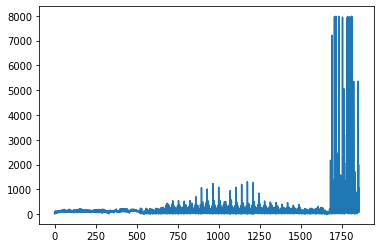

In [12]:
distances, indexes = nbrs.kneighbors(dataset)# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

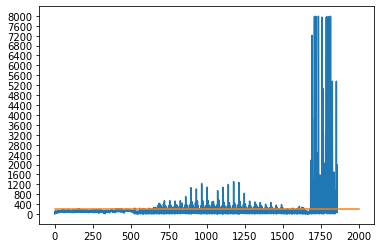

In [22]:
x_coordinates = [0, 2000]
y_coordinates = [208, 208]
plt.yticks(np.arange(0, 9000, 400))
plt.plot(distances.mean(axis =1))
plt.plot(x_coordinates, y_coordinates)

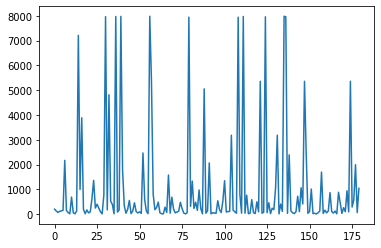

In [16]:
distances2, indexes2 = nbrs.kneighbors(testData)# plot mean of k-distances of each observation
plt.plot(distances2.mean(axis =1))

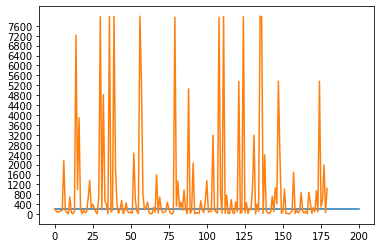

In [23]:
x_coordinates = [0, 200]
y_coordinates = [208, 208]
plt.plot(x_coordinates, y_coordinates)
plt.yticks(np.arange(0, 8000, 400))
plt.plot(distances2.mean(axis =1))

In [21]:
outlier_index = np.where(distances2.mean(axis = 1) > 208)
outlier_index

(array([  6,  10,  14,  15,  16,  22,  23,  24,  25,  26,  29,  30,  32,
         33,  34,  36,  39,  40,  41,  44,  47,  52,  53,  56,  57,  58,
         60,  61,  65,  67,  69,  70,  74,  75,  79,  80,  81,  82,  83,
         85,  86,  88,  91,  96,  99, 100, 104, 108, 109, 111, 113, 116,
        119, 121, 124, 126, 128, 130, 131, 133, 135, 136, 138, 143, 145,
        146, 147, 148, 151, 157, 162, 167, 168, 170, 172, 174, 175, 176,
        177, 179]),)

In [24]:
results = [0] * 180

r = np.array(results)
r[outlier_index] = 1
r

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1])

In [25]:
#number of abnormal data in the testData
c = 0
for i in r:
  if i == 1:
    c+=1
c

80

In [ ]:
instances = []
for i in range(180):
  instances.append("instance_" + str(i))
instances
df = pd.DataFrame({'instances' : instances,'label' : r})
df.rename(columns={0: "instances", 1: "label"})
df["label"] = df.label.astype(np.int)
df
df.to_csv('/content/gdrive/My Drive/DataScience/test.csv',index=False)